# Predicción de la producción de energía éolica con SKlearn.

Este código pertenece a la primera práctica de la asignutra de aprendizaje automático.

100471948 - Celia Patricio Ferrer

100472039 - Alberto García de la Torre

In [1]:
# Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## Lectura del archivo.
---

En primer lugar se lee el archivo que contiene los datos disponibles. Es decir, se realiza la lectura del archivo csv llamado *wind_ava.csv.gz*.

In [2]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

# Imprimir el dataframe.
print(wind_ava)

                 datetime   energy     p54.162.1     p54.162.2     p54.162.3  \
0     2005-01-02 18:00:00   402.71  2.534970e+06  2.526864e+06  2.518754e+06   
1     2005-01-03 00:00:00   696.80  2.537369e+06  2.529277e+06  2.521184e+06   
2     2005-01-03 06:00:00  1591.15  2.533727e+06  2.525703e+06  2.517678e+06   
3     2005-01-03 12:00:00  1338.62  2.534491e+06  2.526548e+06  2.518609e+06   
4     2005-01-03 18:00:00   562.50  2.529543e+06  2.521623e+06  2.513702e+06   
...                   ...      ...           ...           ...           ...   
4743  2009-12-30 06:00:00  1280.13  2.407224e+06  2.400131e+06  2.393033e+06   
4744  2009-12-30 12:00:00   855.00  2.407234e+06  2.400117e+06  2.393001e+06   
4745  2009-12-30 18:00:00   117.06  2.401034e+06  2.393683e+06  2.386332e+06   
4746  2009-12-31 12:00:00   516.96  2.393873e+06  2.386499e+06  2.379125e+06   
4747  2009-12-31 18:00:00   867.07  2.392305e+06  2.384669e+06  2.377033e+06   

         p54.162.4     p54.162.5     p5

---
## Filtrado de datos.
---

Se deben quitar las variables metereológicas que no correspondan a la localización de Sotavento, la localización 13.

In [3]:
X_df = wind_ava.filter(regex='.13$')
# Imprimir el dataframe.
print(X_df)

        p54.162.13  p55.162.13    cape.13    p59.162.13  lai_lv.13  lai_hv.13  \
0     2.510824e+06    9.186295  13.527577  1.386937e+06   2.344111   2.432983   
1     2.513173e+06    8.849569   6.896412  1.153526e+06   2.343719   2.432838   
2     2.509627e+06    7.924080   4.774439  1.098754e+06   2.343300   2.432704   
3     2.510571e+06    6.922709   0.000000  1.076021e+06   2.342830   2.432514   
4     2.505664e+06    6.646282   0.000000  1.070830e+06   2.342437   2.432369   
...            ...         ...        ...           ...        ...        ...   
4743  2.385772e+06   14.413342  24.971074  3.905586e+06   2.349839   2.434994   
4744  2.385708e+06   12.802883  60.248874  2.745694e+06   2.349446   2.434849   
4745  2.379049e+06   10.915997   3.145067  2.254171e+06   2.349054   2.434715   
4746  2.371697e+06   13.048144  12.580268  1.376913e+06   2.347799   2.434291   
4747  2.369547e+06    9.172745   8.487892  1.356687e+06   2.347406   2.434145   

       u10n.13   v10n.13   

In [4]:
# Imprimir las primeras filas del dataframe.
print(X_df.head())

     p54.162.13  p55.162.13    cape.13    p59.162.13  lai_lv.13  lai_hv.13  \
0  2.510824e+06    9.186295  13.527577  1.386937e+06   2.344111   2.432983   
1  2.513173e+06    8.849569   6.896412  1.153526e+06   2.343719   2.432838   
2  2.509627e+06    7.924080   4.774439  1.098754e+06   2.343300   2.432704   
3  2.510571e+06    6.922709   0.000000  1.076021e+06   2.342830   2.432514   
4  2.505664e+06    6.646282   0.000000  1.070830e+06   2.342437   2.432369   

    u10n.13   v10n.13         sp.13     stl1.13  ...      t2m.13     stl2.13  \
0 -0.757587 -1.922799  99846.319914  280.960661  ...  280.473098  281.042026   
1 -1.412620 -1.403011  99917.733093  279.296651  ...  278.286616  280.747406   
2 -2.290185 -0.754580  99764.378681  278.233956  ...  277.206490  280.114863   
3 -3.497855  1.271028  99672.670459  280.787263  ...  280.926600  279.991138   
4 -0.971249  0.553060  99372.811211  279.583112  ...  277.363875  280.576898   

      stl3.13   iews.13   inss.13     stl4.13    f

In [32]:
# Imprimir la variable de salida.
print(wind_ava['energy'].head())

0     402.71
1     696.80
2    1591.15
3    1338.62
4     562.50
Name: energy, dtype: float64


Obtenemos que son valores númericos de salida, lo que significa que se trata de un problema de reglesión.

In [5]:
# Imprimir el tamaño del dataframe.
print(X_df.shape)

(4748, 22)


In [6]:
# Imprimir el tipo de atributos.
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   p54.162.13  4748 non-null   float64
 1   p55.162.13  4748 non-null   float64
 2   cape.13     4748 non-null   float64
 3   p59.162.13  4748 non-null   float64
 4   lai_lv.13   4748 non-null   float64
 5   lai_hv.13   4748 non-null   float64
 6   u10n.13     4748 non-null   float64
 7   v10n.13     4748 non-null   float64
 8   sp.13       4748 non-null   float64
 9   stl1.13     4748 non-null   float64
 10  u10.13      4748 non-null   float64
 11  v10.13      4748 non-null   float64
 12  t2m.13      4748 non-null   float64
 13  stl2.13     4748 non-null   float64
 14  stl3.13     4748 non-null   float64
 15  iews.13     4748 non-null   float64
 16  inss.13     4748 non-null   float64
 17  stl4.13     4748 non-null   float64
 18  fsr.13      4748 non-null   float64
 19  flsr.13     4748 non-null  

---
## Análisis Exploratorio de Datos Simplificado.
---

### Variables.

Identificar qué varibles son categóricas y qué variables son numéricas.

Esto se hace para comprobar si hay categóricas que deban ser codificadas (como dummies / one-hot-encoding)

In [7]:
categoricas = X_df.select_dtypes(include=['object']).columns
numericas = X_df.select_dtypes(exclude=['object']).columns

# Imprimir por pantalla dicho resultado.
print("Variables categóricas:", categoricas)
print("Variables numéricas:", numericas)

Variables categóricas: Index([], dtype='object')
Variables numéricas: Index(['p54.162.13', 'p55.162.13', 'cape.13', 'p59.162.13', 'lai_lv.13',
       'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13', 'stl1.13', 'u10.13',
       'v10.13', 't2m.13', 'stl2.13', 'stl3.13', 'iews.13', 'inss.13',
       'stl4.13', 'fsr.13', 'flsr.13', 'u100.13', 'v100.13'],
      dtype='object')


Análisis completo de cada variable.

In [43]:
for variable in X_df.select_dtypes(exclude=['object']).columns:
    summary = X_df[variable].describe()
    print(f"Variable: {variable}")
    print(f"Media: {summary['mean']}")
    print(f"Desviación típica: {summary['std']}")
    var = summary['std']**2
    i = var / summary['mean']
    print(f"Varianza/Media: {i}\n")

Variable: p54.162.13
Media: 2489476.6393768108
Desviación típica: 44825.98673659568
Varianza/Media: 807.1451867138051

Variable: p55.162.13
Media: 16.00880964347183
Desviación típica: 6.55221574449063
Varianza/Media: 2.681744122047062

Variable: cape.13
Media: 31.166541239625015
Desviación típica: 121.75897676742318
Varianza/Media: 475.6783343222294

Variable: p59.162.13
Media: 1706692.1453515699
Desviación típica: 1466952.6504766275
Varianza/Media: 1260889.425548456

Variable: lai_lv.13
Media: 2.815221523542665
Desviación típica: 0.3973773219240904
Varianza/Media: 0.05609105168422072

Variable: lai_hv.13
Media: 2.576283897024476
Desviación típica: 0.11643415973450091
Varianza/Media: 0.005262197061720203

Variable: u10n.13
Media: 0.38621517539105976
Desviación típica: 3.1005825845448545
Varianza/Media: 24.89185556690942

Variable: v10n.13
Media: 0.12052767508657299
Desviación típica: 3.016765672949409
Varianza/Media: 75.50859268586154

Variable: sp.13
Media: 97820.30128676056
Desviació

Preocupante:
- lai_lv.13
- lai_hv.13
- stl1.13
- t2m.13
- stl2.13
- iews.13 --> sospechoso
- stl4.13
- fsr.13
- flsr.13

### Número de características e instancias.

In [8]:
# Imprimir la cantidad de característica e instancias del dataframe.
print("Nº de características: ", X_df.shape[1])
print("Nº de instancias: ", X_df.shape[0])

Nº de características:  22
Nº de instancias:  4748


### Valores faltantes.

En esta sección se especifica si hay valores faltantes (*missing values*) y qué variables los tienen.

In [9]:
# Imprimir la cantidad de valores faltantes por variable.
print(X_df.isnull().sum())

p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64


### Columnas constantes.

Evualuación de columnas constantes y en caso de haberlas, eliminarlas.

In [10]:
columnas_constantes = X_df.columns[X_df.nunique() == 1]
X_df = X_df.drop(columnas_constantes, axis=1)
print("Columnas constantes eliminadas:", columnas_constantes)

Columnas constantes eliminadas: Index([], dtype='object')


Ver variables con varianza muy muy pequeña, para evaluar más tarde si renta o no eliminarlas.

### Regresión o clasificación.

Determinar si el problema es de regresión o de clasificación. 

- Si se trata de un problema de clasificación o de regresión (variable de salida es una clase o un valor continuo), y en caso de clasificación, si la clase está desequilibrada.

En nuestro caso, la varible de salida es *energy*.

In [11]:
if 'energy' in wind_ava.columns:
    if wind_ava['energy'].dtype == 'object':
        # La variable de salida es una clase.
        print("Se trata de un problema de clasificación.")
        # Si se trata de un problema de clasificación.
        # Se debe comprobar si la clase está balanceada.
    else:
        # La variable de salida es un valor continuo.
        print("Se trata de un problema de regresión.")
else:
    print("No se ha encontrado la variable de salida.")

Se trata de un problema de regresión.


In [12]:
y_df = wind_ava['energy']

### Correlación de variables

<Axes: >

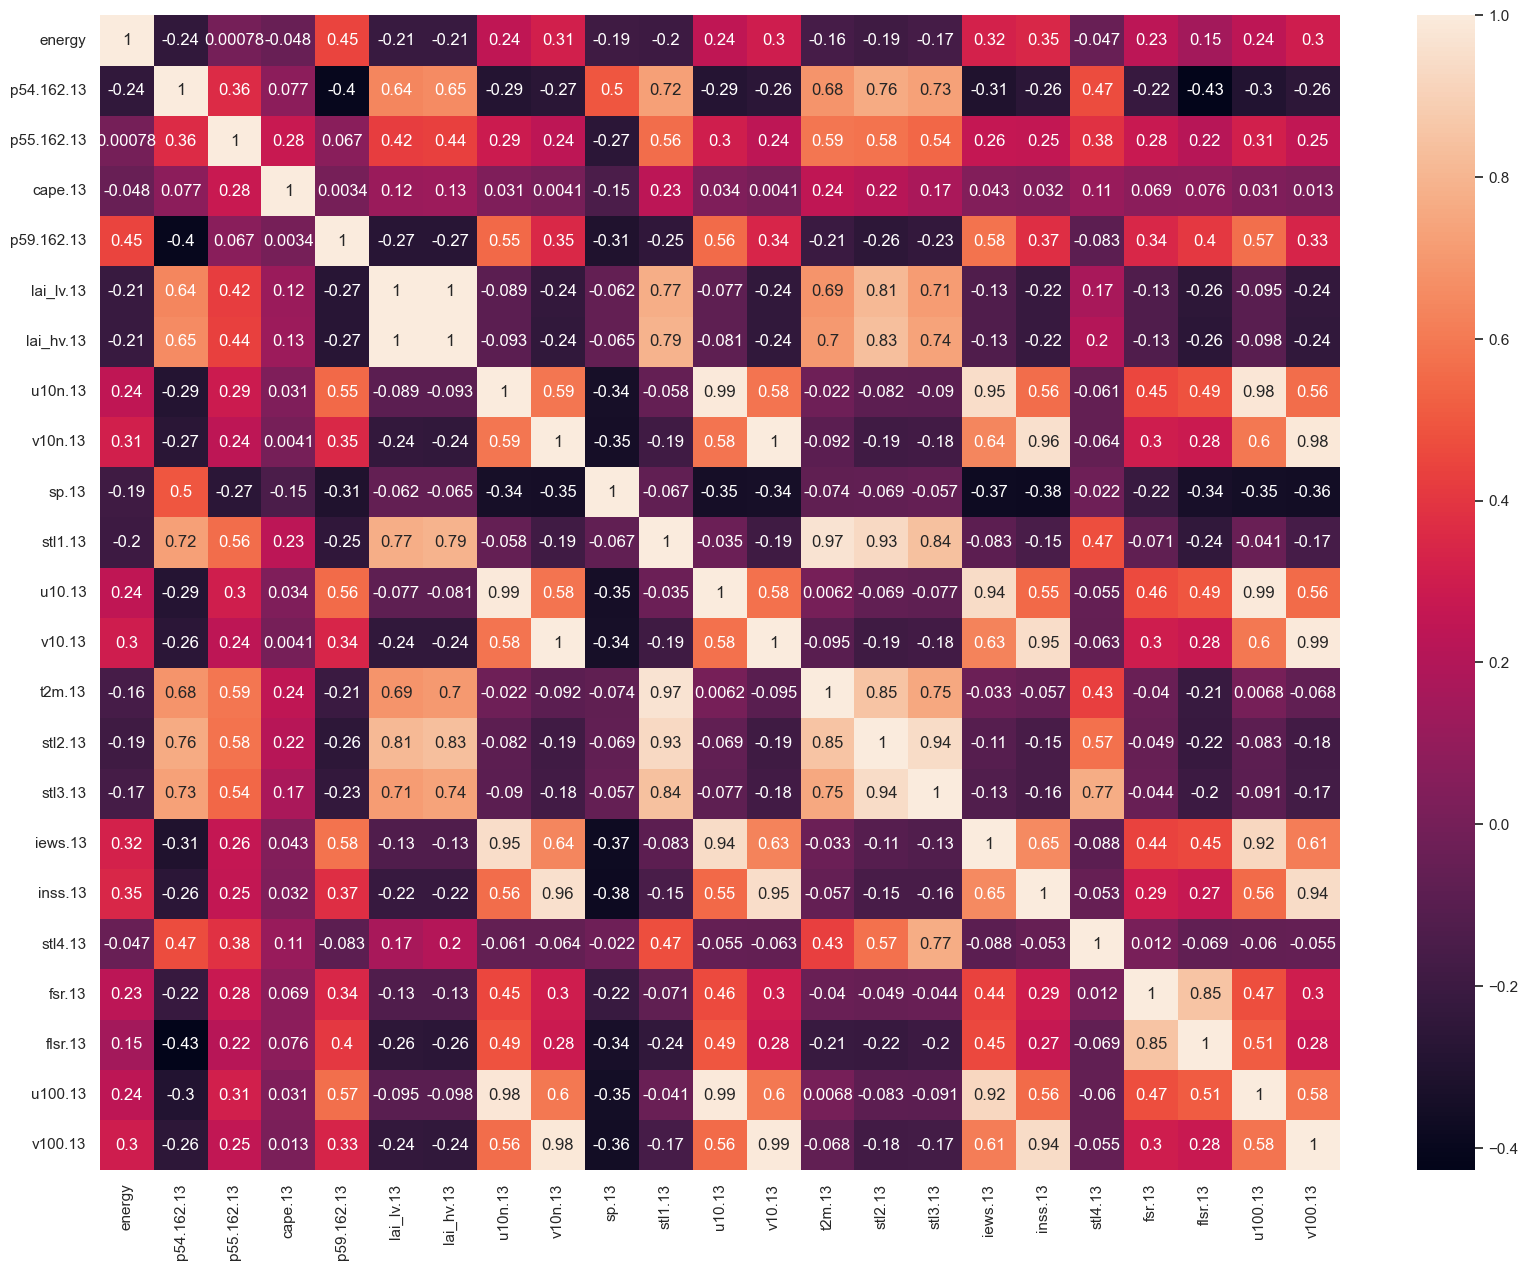

In [21]:

# Creamos la matriz de correlación con la variable de salida
plt.figure(figsize=(20, 15))
df = X_df.copy()
df.insert(0, 'energy', wind_ava['energy'])
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)

Según la leyenda, ningún par de variables tienen una alta correlación negativa, ya que ninguna rebaja el -0.4
Sine embargo, hay algunos pares de variables que muestran una alta correlación positiva. Son los siguientes:
- u10 - u10n
- v10 - v10n
- lai_lv - lai_hv
- u10n - iews
- u100 - iews
- v100 - inss
- stl2 - stl3
- u100 - u10
- v100 - v10
- u100 - u10n
- v100 - v10n

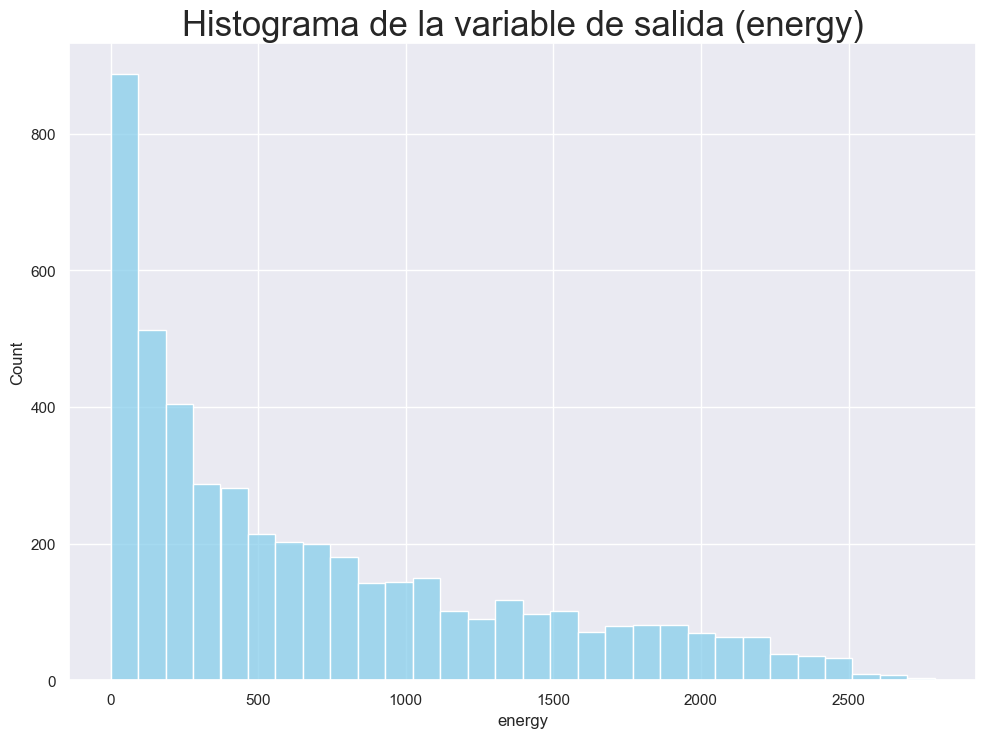

In [38]:
sns.histplot(y_df, bins=30, color='skyblue')
plt.title('Histograma de la variable de salida (energy)', size=25)
plt.show()

Es exponencial. Frecuencia en bahas energias hay muchas.

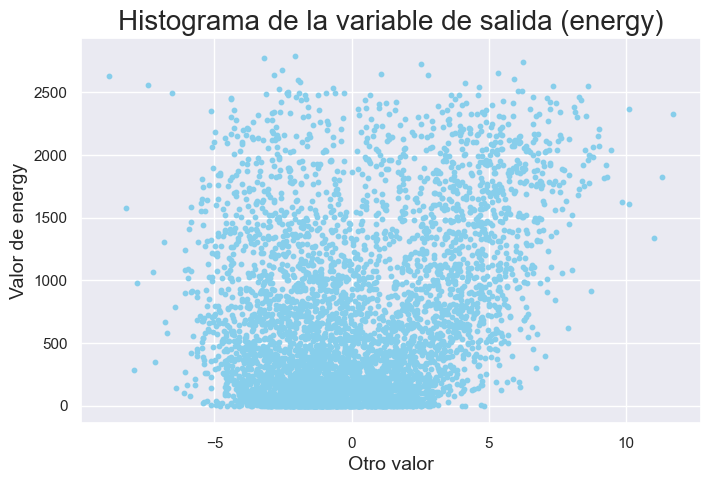

In [16]:
# Dibujamos cómo se distribuye la variable de salida
plt.figure(figsize=(8, 5))
plt.scatter(wind_ava['v10.13'], y_df, color='skyblue', marker='o', s=10)
plt.title('Histograma de la variable de salida (energy)', size=20)
plt.xlabel('Otro valor', size=14)
plt.ylabel('Valor de energy', size=14)
plt.grid(True)
plt.show()

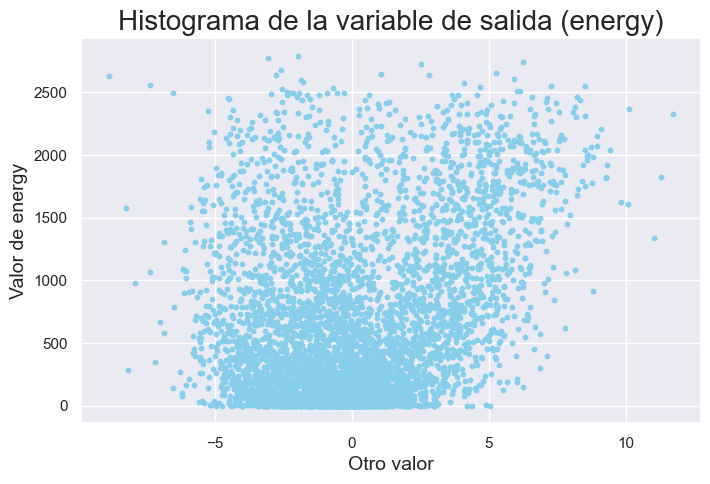

In [17]:
# Dibujamos cómo se distribuye la variable de salida
plt.figure(figsize=(8, 5))
plt.scatter(wind_ava['v10n.13'], y_df, color='skyblue', marker='o', s=10)
plt.title('Histograma de la variable de salida (energy)', size=20)
plt.xlabel('Otro valor', size=14)
plt.ylabel('Valor de energy', size=14)
plt.grid(True)
plt.show()

In [44]:
# División de los datos.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=42)

## Clasificador DUMMY

Regresor simple y básico para problemas de regresión.

In [48]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics

# Crear el modelo.
dummy_regr = DummyRegressor(strategy="mean")
# Entrenar el modelo.
dummy_regr.fit(X_train, y_train)
# Cálculo de la media.
rmse = np.sqrt(metrics.mean_squared_error(y_test, dummy_regr.predict(X_test)))
r2 = metrics.r2_score(y_test, dummy_regr.predict(X_test))

# Imprimir el resultado.
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


RMSE: 664.2813067710736
R2: -0.0002287731466630305


In [53]:
from sklearn import tree

# Here, we set our model to classification tree
regr = tree.DecisionTreeRegressor()
np.random.seed(42) # reproducibility
# We train it
regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_tree = metrics.r2_score(y_test, y_test_pred)

# Imprimir el resultado.
print(f"RMSE: {rmse_tree}")
print(f"R2: {r2_tree}")


RMSE: 501.56832129995297
R2: 0.42976288763522374


In [ ]:
# Realizar predicciones.
y_pred = dummy_regr.predict(X_test)

# Clasificador lineal

# Clasificador árbol

# Clasificación con regularización